In [139]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [140]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [141]:
len(X_train)

60000

In [142]:
len(X_test)

10000

In [143]:
X_train[0].shape

(28, 28)

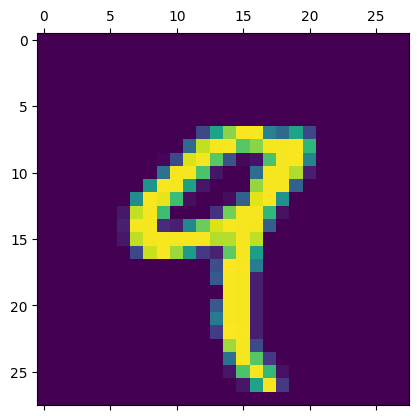

In [144]:
plt.matshow(X_train[4])

In [145]:
y_train[2]

4

In [146]:
X_train = X_train / 255
X_test = X_test / 255

In [147]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [148]:
X_train_flattened.shape

(60000, 784)

In [149]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8683 - loss: 0.4658
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9617 - loss: 0.1312
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9738 - loss: 0.0893
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9815 - loss: 0.0640
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9862 - loss: 0.0451


In [150]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9721 - loss: 0.0960


[0.08352730423212051, 0.9754999876022339]

In [151]:
model.export("./saved_model/")

INFO:tensorflow:Assets written to: ./saved_model/assets


INFO:tensorflow:Assets written to: ./saved_model/assets


Saved artifact at './saved_model/'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='keras_tensor_80')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  1798545550480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1798545547792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1798545544144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1798545541648: TensorSpec(shape=(), dtype=tf.resource, name=None)


# Post Training Quantization

In [152]:
#Without quantization

converter = tf.lite.TFLiteConverter.from_saved_model("./saved_model/")
tflite_model = converter.convert()

len(tflite_model)

319992

In [153]:
#With quantization

converter = tf.lite.TFLiteConverter.from_saved_model("./saved_model/")
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

len(tflite_quant_model)

86056

In [154]:
with open("tflite_model.tflite", "wb") as f:
    f.write(tflite_model)

In [155]:
with open("tflite_quant_model.tflite", "wb") as f:
    f.write(tflite_quant_model)